In [11]:
import numpy as np
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from scipy import stats

In [12]:
def open_models(input_dir, site):
    with open(input_dir+'/result_models_bs500_'+site+'.bf', 'rb') as resultsf:
        models =  pickle.load(resultsf)
    
    return models

In [28]:
def plothist(site,models,check_list):
    #N = len(check_list)
    N = 1
    
    std_list_pri = []
    std_list_pos = []
    for model in models:
        dict_weights = model.to('cpu').state_dict()
        ks_list = []
        
        for key in dict_weights:
            n, p = key, dict_weights[key]
            plt.subplots_adjust(wspace=0.4, hspace=0.6)
            if n in check_list:
                plt.subplot(len(models),len(check_list),N) #, title=key)
                N=N+1
                tmp0 = p.detach()
                tmp1 = tmp0.numpy()
                w = tmp1.flatten()
                ks_list.append(stats.kstest((w-np.mean(w))/np.std(w), 'norm').pvalue)

                plt.hist(w, bins=100,color='deepskyblue')
                plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
                plt.gca().yaxis.offsetText.set_fontsize(3)
                plt.gca().ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
                plt.tick_params(labelsize=5)
            
            if n == 'dense3.weight':
                std_list_pri.append(np.std(w))
            if n == 'dense3_cl.weight':
                std_list_pos.append(np.std(w))
            
        print(ks_list)
    plt.savefig('hist_'+site+'.png', dpi=300)
    plt.show()
    print(sum(std_list_pri)/len(std_list_pri))
    print(sum(std_list_pos)/len(std_list_pos))

In [29]:
ref = ['UM', 'UCLA', 'LEUVEN', 'TRINITY', 'SDSU', 'SBL', 'MAX_MUN', 'OLIN', 'PITT', 'NYU', 'KKI', 'OHSU', 'USM', 'STANFORD', 'CALTECH', 'YALE']

In [30]:
check_list = ['dense00.weight',
'dense0.weight',
'dense05.weight',
'dense1.weight',
'dense3.weight',
'dense3_oc.weight',
'dense3_cl.weight']

UM
[0.8846847673466027, 0.9077803944163833, 0.817674251408256, 0.9221816694837517, 0.7613358183376431, 0.447617081391499, 0.8106653599080185]
[0.8604961816290766, 0.6757375087958108, 0.9611541495659153, 0.9566092721850195, 0.875977733256376, 0.7623751543031337, 0.9276619536623484]
[0.610827597286514, 0.815364946214802, 0.9246918707046714, 0.3789660582909893, 0.3451813658441911, 0.6505937428665107, 0.5260505123192725]
[0.8426475047357247, 0.46188595443508884, 0.9662570635100152, 0.682479985321365, 0.7473382385696326, 0.3877298141139548, 0.47950507896150873]
[0.713697714574031, 0.8015696768869488, 0.1288884128409693, 0.5016811929727623, 0.8980432827134677, 0.6244534633849692, 0.6647989833065673]


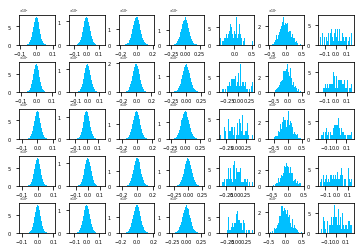

0.165384641289711
0.07539547383785247
UCLA
[0.9963941246722204, 0.9717037174245535, 0.8989198738722557, 0.709209354706102, 0.449626667013599, 0.8117120726846602, 0.9704114905204416]
[0.9594099758656849, 0.7983762827308037, 0.620602577969835, 0.9633299849815111, 0.8323501223765625, 0.25805302563635846, 0.9445164920976201]
[0.424180410557669, 0.9683987225426873, 0.9346652782429903, 0.6064408452073786, 0.693714781305487, 0.17877963637515837, 0.4155941955584064]
[0.9174668700981345, 0.6375248734791104, 0.5232654285340848, 0.8072890368637825, 0.8971602686235193, 0.16943069226999719, 0.629591013133422]
[0.858437125572097, 0.7713492791009916, 0.7766402646284429, 0.8845248517869531, 0.5805415262487663, 0.7603000340301637, 0.834077333686859]


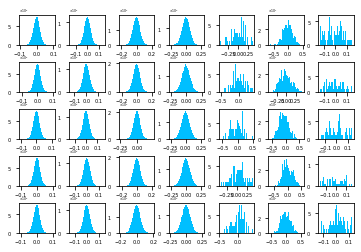

0.16786384880542754
0.07139044851064683
LEUVEN
[0.5754456570600099, 0.7480028468654303, 0.5852627131195591, 0.9997744269838829, 0.6679848567068374, 0.8689126121229884, 0.1491051027763899]
[0.9000136086483514, 0.18349139503806222, 0.8113904341024412, 0.8444010417964536, 0.5822341841324983, 0.21755303798721637, 0.8076318228782328]
[0.6592525303049575, 0.7386620146923226, 0.9633511874512497, 0.8565676470799797, 0.9976992936046473, 0.7868001103405988, 0.7772468350284563]
[0.5906780252837962, 0.9756709450116308, 0.9147117469666728, 0.9081008763356679, 0.6924478235844681, 0.8819659672586135, 0.6648475177190165]
[0.7171810778095551, 0.8200947070511304, 0.9894884477444916, 0.9226980596883707, 0.9185944126946854, 0.4400032446976423, 0.9741170749607228]


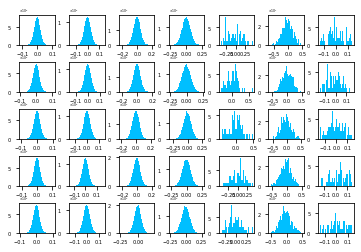

0.17218668460845948
0.07140185832977294
TRINITY
[0.8542473696681174, 0.9948604215879993, 0.4125928109121807, 0.7217799367265019, 0.7814277052344077, 0.08774843703898183, 0.8977567213265143]
[0.6003051061671381, 0.9978520995367961, 0.7800443374774151, 0.9171565026051272, 0.6119863109923973, 0.9058194889466707, 0.9241185617942593]
[0.9917207752392336, 0.9653777105497928, 0.370904950105888, 0.8925124788197905, 0.49086001042508587, 0.9301765089970639, 0.3184320892560365]
[0.9091156638682221, 0.7326965710062766, 0.4958416941835353, 0.5713542377410462, 0.7645502938664859, 0.313436838553628, 0.7487434019995394]
[0.9289703545459975, 0.5232655326063952, 0.8551096011093228, 0.5945723339196269, 0.8465446798732338, 0.988644179798894, 0.5898582786782842]


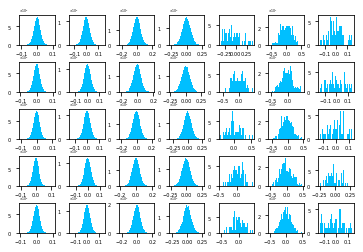

0.16742518544197083
0.07594656199216843
SDSU
[0.353031263716141, 0.9485997579961821, 0.8843822589200981, 0.8425074771550343, 0.4098443142595003, 0.3363997381317857, 0.7620764214585461]
[0.4962704762973511, 0.986646509320572, 0.5576874320370568, 0.9368019834593209, 0.9227682745492242, 0.3950956984598607, 0.3996010448669448]
[0.2207864942362202, 0.5824150735164655, 0.7356652746981283, 0.449957793777754, 0.7667384909040085, 0.980498190552494, 0.732391172961669]
[0.9804573549248764, 0.6052857546265825, 0.9767396630556782, 0.44525041140799126, 0.5964818164666694, 0.9109056180954709, 0.39614352800126296]
[0.5637583874688081, 0.6729973718003575, 0.49183746514900994, 0.7436266331010593, 0.3228800632545308, 0.3675657254842306, 0.3257413969887588]


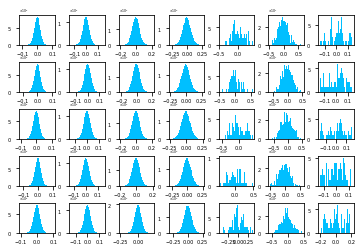

0.16569643318653107
0.08051086068153382
SBL
[0.9884188154414516, 0.8673514140698791, 0.37966445956185124, 0.8111180631143584, 0.7337886648661418, 0.20992763987308816, 0.8756104198396459]
[0.9104221138920431, 0.8827151850876326, 0.9599850489738347, 0.7414048655340711, 0.9751383242040577, 0.6457920229018626, 0.4692264816881585]
[0.3471406340368499, 0.9977299106560379, 0.8258307735787376, 0.8315108024682758, 0.990202028269482, 0.968521639060406, 0.48254865010600667]
[0.6566654341070768, 0.8732686371531704, 0.8029295027427299, 0.9883227163180339, 0.9270825224929113, 0.2978435230693015, 0.29361674270887117]
[0.9925824792271276, 0.9744328101772083, 0.9360468310607731, 0.6083130010703192, 0.9450049802078855, 0.9745863970432102, 0.5189755363102884]


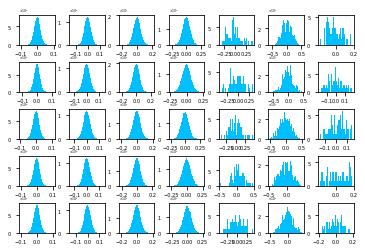

0.15840113162994385
0.0869853675365448
MAX_MUN
[0.7776229563631758, 0.7261142383651159, 0.9230461045450081, 0.5221582600382474, 0.8287821088416857, 0.7066114947917825, 0.7623165675038621]
[0.9777835210812864, 0.9307416420318574, 0.893317883824731, 0.8668115548891624, 0.9033316792496486, 0.5343601477789617, 0.3965906238925401]
[0.553852792358285, 0.7567089676154851, 0.5556681571011762, 0.3187121477338547, 0.6892872967572954, 0.20992714498603438, 0.9920837741016446]
[0.866498707227697, 0.9901084440932842, 0.7218381383720999, 0.9707510691482093, 0.7946986389410153, 0.24673507091429137, 0.5517666149764628]
[0.7674280211217067, 0.7702210043840388, 0.3584919567755068, 0.6483250007877466, 0.9907727597069125, 0.4983724170477264, 0.682789273966478]


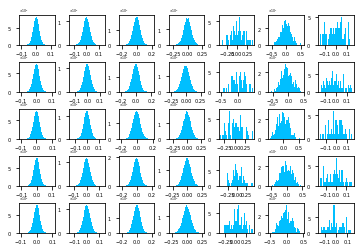

0.17084372341632842
0.07425922900438309
OLIN
[0.6647806777173515, 0.46515136731239715, 0.7421248568018384, 0.7929665935994045, 0.9241432063181136, 0.666291240928278, 0.9262126208165133]
[0.3023457913413221, 0.61145565275519, 0.39717014416420904, 0.5194640475634665, 0.8989698535073356, 0.0820901001123272, 0.8469203990808358]
[0.6538398506318486, 0.868773143839642, 0.5410317690958877, 0.85410438768765, 0.9818726373718665, 0.7813503978652772, 0.5903265794421138]
[0.9830950719255661, 0.7179759370880081, 0.9823659625749098, 0.6684611490583646, 0.5230665378801749, 0.9139970264031737, 0.301600860053293]
[0.9839104454932915, 0.9673710343101991, 0.829011399687337, 0.8046301554268207, 0.8240142546531569, 0.12166780579431835, 0.9476921150655071]


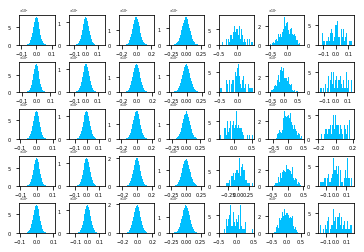

0.1643166422843933
0.07336747199296952
PITT
[0.6159923090457593, 0.7971169036302899, 0.9350884452970842, 0.8892937588101083, 0.7252426394684854, 0.2950988526623016, 0.8052806342039159]
[0.5744605588612406, 0.614969704207128, 0.8951959727495007, 0.5448476324727141, 0.9195351670312544, 0.14813846098610017, 0.628008469832436]
[0.8696643162833554, 0.6811453332566315, 0.3862237230245944, 0.6793698812782518, 0.7315529505435288, 0.4554745155279726, 0.5817883229610916]
[0.6734862211467678, 0.8748695512587079, 0.9973376886305154, 0.7677076528454825, 0.8642602580360219, 0.4203326863857991, 0.6026453088431545]
[0.6832367701400511, 0.6261500835835108, 0.7354756574547309, 0.9687568324631246, 0.9049742335379477, 0.6125349007389843, 0.5246894564590598]


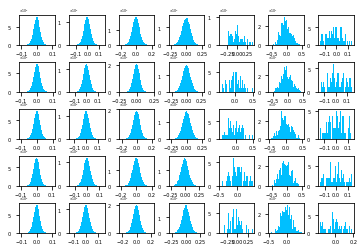

0.16430359780788423
0.07444137781858444
NYU
[0.9250156624643939, 0.8682009170741968, 0.5913353438381996, 0.9918154353264919, 0.7291392331454456, 0.684131886986461, 0.8912258540044801]
[0.9028306168720035, 0.8649570456017212, 0.9558564438986205, 0.8176826098966834, 0.9747255159146115, 0.566805074084909, 0.3546675074018635]
[0.5355917334622571, 0.5615686474835957, 0.929581110683627, 0.9762060925454867, 0.3938147623468733, 0.5470318365752604, 0.34058327592047766]
[0.9497813696406116, 0.33763578907761216, 0.963865313124058, 0.7789734860173358, 0.6404117331281838, 0.4512400016964331, 0.5146106367175138]
[0.4046998579019113, 0.9595225802067067, 0.8026152127907149, 0.7464916486553813, 0.9674742409830364, 0.2492716518413075, 0.5607053189116317]


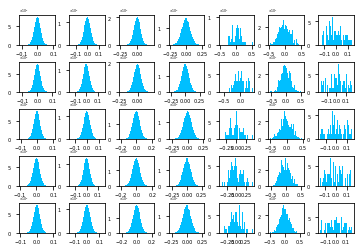

0.16064368486404418
0.07953396141529083
KKI
[0.934507619819898, 0.8493775044664618, 0.9045918581917024, 0.9817600910308895, 0.7847794267875247, 0.1955549890345566, 0.5644534305148936]
[0.8363974420544256, 0.8351011054350358, 0.639909134858071, 0.9097715574518103, 0.37763279974434094, 0.4958654757155704, 0.18419198367078038]
[0.7263950123314691, 0.6501974099738831, 0.9794805869160124, 0.6422585990730393, 0.6646550489203189, 0.20601138019318854, 0.535857711574049]
[0.9442174809346553, 0.9915557349539718, 0.9213859183873, 0.5292052622515913, 0.6543715252289034, 0.17786482370188317, 0.7684648088510583]
[0.858294133640264, 0.6011714451779073, 0.7022013140347013, 0.6384063781814197, 0.947006489914092, 0.13380922185101174, 0.37898379186390707]


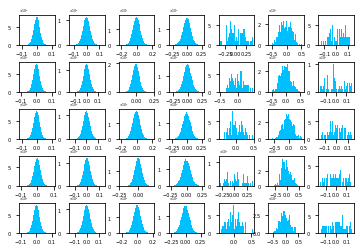

0.16345858871936797
0.07553301602602006
OHSU
[0.4664059539617258, 0.744455304730255, 0.8863267292524739, 0.5341901807585459, 0.4986016053766429, 0.46315863854133255, 0.4802212024774499]
[0.8551096292667009, 0.9975926079318922, 0.5779473622627158, 0.8113526769177523, 0.8006593399299944, 0.09914701048039354, 0.7437045527859121]
[0.8223921459219936, 0.8577826923283207, 0.6688686404208664, 0.7979026577663857, 0.9637516662027709, 0.4631230589350588, 0.3691587514637422]
[0.5149641999709789, 0.5831266382917878, 0.259675968409277, 0.9675529035334092, 0.9410917236736642, 0.9988276002172982, 0.5441926992204996]
[0.9142930795524083, 0.7450561368237514, 0.8092355728541919, 0.7200259115905461, 0.365148929386204, 0.43289140038106877, 0.7841584336601808]


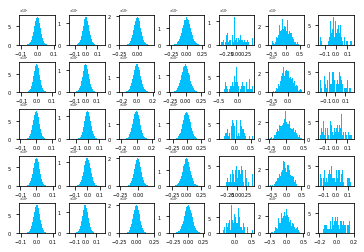

0.1730766177177429
0.07592079341411591
USM
[0.7491573562620499, 0.9518335416805563, 0.96900413987633, 0.9667994158017711, 0.5533603786490888, 0.8737207153407488, 0.6724797410546871]
[0.7267946330685011, 0.324064364858348, 0.8525523778778704, 0.5866755141071697, 0.8006564423895486, 0.7873840240912502, 0.5736218312793562]
[0.5926521664210953, 0.9276916501757406, 0.8558784861200252, 0.8184730176106426, 0.4296561754306687, 0.6327901751536379, 0.7971699414511528]
[0.7700118228224728, 0.7366475218126907, 0.19892624319583396, 0.697534331492395, 0.7184015198099909, 0.5085572277814066, 0.5225949127270513]
[0.3878382988878588, 0.9491486498050723, 0.5472259530033543, 0.9046655311842149, 0.662534150561281, 0.8420657570170471, 0.743505964382951]


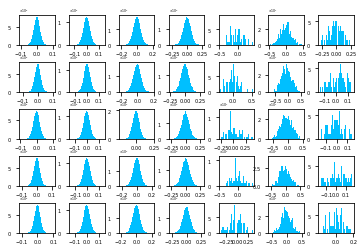

0.1548856794834137
0.08434932678937912
STANFORD
[0.6425414933534508, 0.9503431687800338, 0.907318779560916, 0.9406978471144961, 0.9505105520243363, 0.9666488823030662, 0.6288294225561882]
[0.8838613626089041, 0.7598270747729425, 0.9950736686035219, 0.9484246074067115, 0.5873267782291582, 0.7440566771190593, 0.4459473665557254]
[0.9368426039460409, 0.5772993481923272, 0.9352666109541832, 0.9983554775185883, 0.42993856748285664, 0.5615092143720205, 0.3033638387120253]
[0.575995393625883, 0.8824824272331189, 0.85470971578471, 0.9059058123981234, 0.8008738673684647, 0.45030041872243576, 0.4198853651462442]
[0.5891149419748127, 0.8991037986577295, 0.80308093559266, 0.660336776518103, 0.9933285982751923, 0.6916759880538859, 0.4322945589060804]


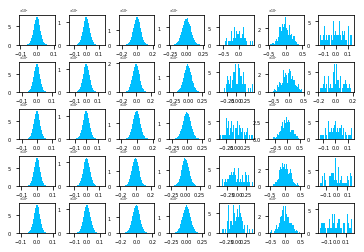

0.17270525693893432
0.07901769131422043
CALTECH
[0.7631242490965642, 0.5093512905372206, 0.9999823734718684, 0.7445343111673746, 0.6155467263252314, 0.12560003272047726, 0.38067601387133454]
[0.7027025081002615, 0.8454646072228793, 0.6414392136482974, 0.8720446064392007, 0.2779001689665549, 0.8762975508971664, 0.1326774930806668]
[0.5678755656049406, 0.849522296518647, 0.8699331602248352, 0.5300406962409635, 0.22057895788372628, 0.4322077987328814, 0.9713100268935209]
[0.7322190124253624, 0.6796262188408606, 0.2040945124644079, 0.37070310079041957, 0.8885485117665421, 0.8040415428111085, 0.6816328783680115]
[0.9702418398659649, 0.9992511157119967, 0.5135766636460968, 0.9467394452621254, 0.6303165036786266, 0.9393474651944468, 0.6009879799694253]


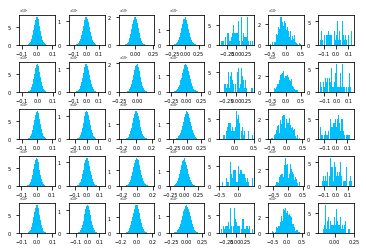

0.173680317401886
0.0747073084115982
YALE
[0.974537687845394, 0.3734153051486838, 0.49637686318380314, 0.8362656348934616, 0.3120426899053672, 0.3958061388326042, 0.5991077435479221]
[0.9990899779811971, 0.9784699761449767, 0.4108031776790254, 0.3967238955740372, 0.8114303462862502, 0.3466469328275038, 0.9378988439045028]
[0.9737173374578723, 0.8963855816749247, 0.84375084854865, 0.905295063606304, 0.5454168086131781, 0.3674762869766456, 0.3465296545302273]
[0.6650384233757776, 0.8098189680378987, 0.6911245515304772, 0.9751590728144419, 0.4469927752094569, 0.5651678557572013, 0.9622047575258044]
[0.7403827867814958, 0.579581905226307, 0.9911736294195878, 0.9766001105953268, 0.3373609497488318, 0.9406252570746393, 0.1940867169150321]


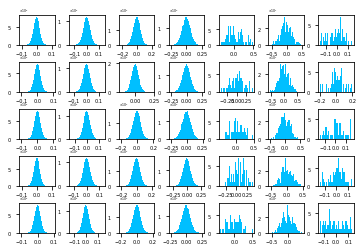

0.16861820220947266
0.07377654016017914


In [32]:
for site in ref:
    print(site)
    models = open_models("./models", site)
    plothist(site, models['transfer_models'], check_list)
    